In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

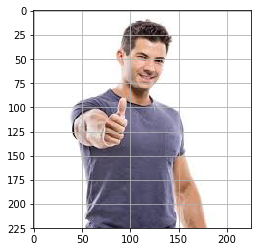

In [40]:
# READ an Image
full = cv2.imread('Images/boy.jpeg')
# Convert BGR mapped image to RGB
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)
plt.grid(True)


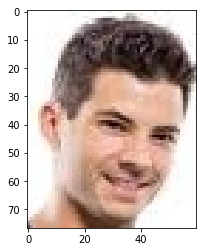

In [42]:
face_boy = cv2.imread('Images/face_boy.jpeg')
face_boy = cv2.cvtColor(face_boy,cv2.COLOR_BGR2RGB)
plt.imshow(face_boy)

In [43]:
#Shapes of full and face_boy
print(full.shape,'\n',face_boy.shape)

(225, 225, 3) 
 (77, 60, 3)


In [44]:
# Different comparision methods in templates matching
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

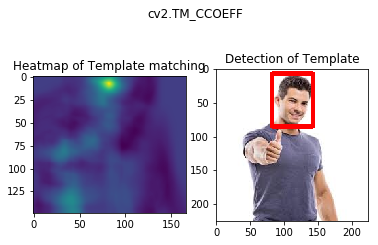

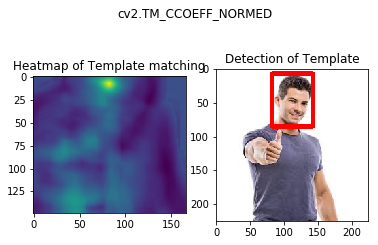

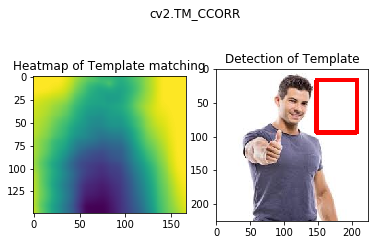

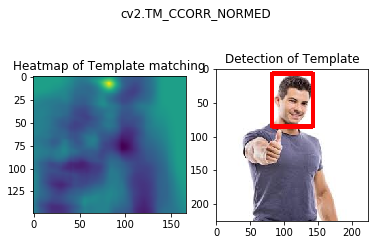

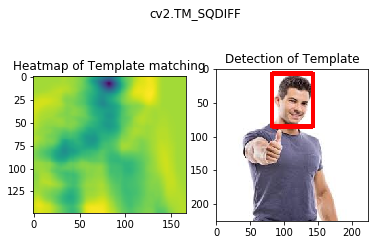

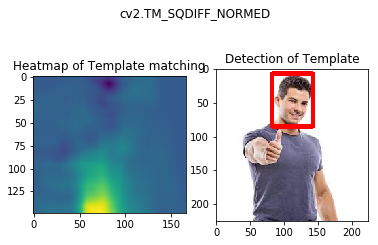

In [45]:
# IMPLEMENTATION

for m in methods:
    
    full_copy = full.copy()
    method = eval(m)
    
    res = cv2.matchTemplate(full_copy,face_boy,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height,width,channels = face_boy.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),5)
    
    
    # Plot the heatmaps and marked images by different methods
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of Template matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of Template')
    
    plt.suptitle(m)
    
    plt.show()
    
    print('\n\n\n\n')
    
        